In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import sys
import time
import datetime

from statistics import mode

import matplotlib.dates as mdates


crypto_path = "resources/cleaned_crypto.csv"
xiv_path = "resources/vix_data.csv"

crypto_data = pd.read_csv(crypto_path,low_memory=False)
vix_data = pd.read_csv(xiv_path)

In [18]:
#filter the data with 4 agreed cryptos

fourcoin_data = crypto_data.loc[crypto_data['crypto_name'].isin(['Bitcoin','Ethereum','Dogecoin','Stellar'])]

In [19]:
#cleanning the vix data
vix_data = vix_data[(vix_data['Date'] >= '2016-01-01') & (vix_data['Date'] <= '2020-08-09')]
vix_data = vix_data.rename(columns={"Adj Close": "Adj_close"})

In [50]:
#merge data together
merged_df = fourcoin_data.merge(vix_data, left_on='trade_date', right_on='Date')
merged_df['trade_date'] = pd.to_datetime(merged_df.trade_date)
merged_df['Date'] = pd.to_datetime(merged_df.Date)

merged_df.head()


,Unnamed: 0_x,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,crypto_name,crypto_type,ticker,minable,trade_year,trade_month,trade_day,Unnamed: 0_y,Date,Adj_close
0,3,2016-01-04,38477500.0,433.090000,6.515713e+09,0.007466,0.007163,Bitcoin,0.0,BTC,1.0,2016,1,4,6553,2016-01-04,20.700001
1,1749,2016-01-04,346245.0,0.954480,7.254371e+07,-0.017599,-0.017929,Ethereum,0.0,ETH,1.0,2016,1,4,6553,2016-01-04,20.700001
2,10991,2016-01-04,4634.0,0.001748,8.456957e+06,0.002431,0.002294,Stellar,0.0,XLM,0.0,2016,1,4,6553,2016-01-04,20.700001
3,36390,2016-01-04,92160.0,0.000144,1.472594e+07,-0.014370,-0.013699,Dogecoin,0.0,DOGE,1.0,2016,1,4,6553,2016-01-04,20.700001
4,4,2016-01-05,34522600.0,431.960000,6.500393e+09,-0.002351,-0.002609,Bitcoin,0.0,BTC,1.0,2016,1,5,6554,2016-01-05,19.340000


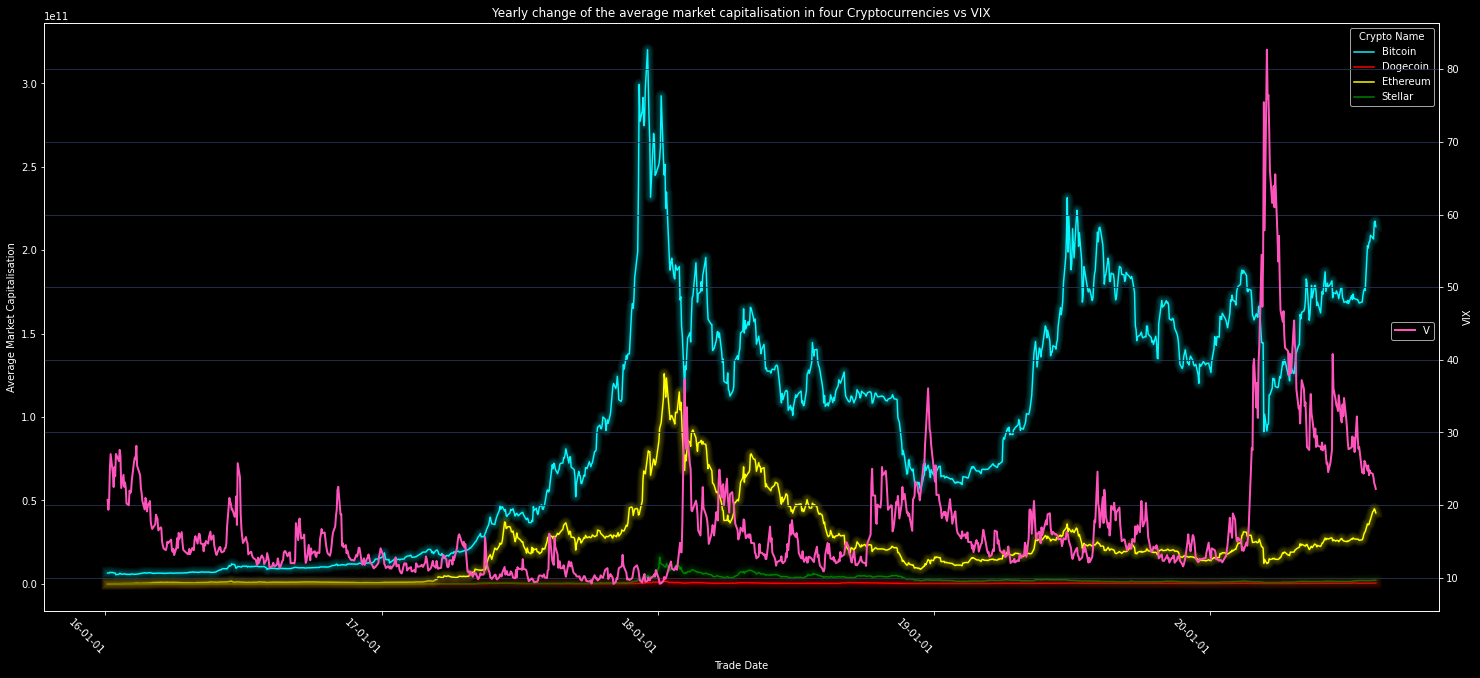

In [61]:
#Market Cap
plt.style.use("dark_background")

#colours to the lines
colors = [
    '#08F7FE',  # teal/cyan
    'red',    # red
    'yellow',  # yellow
    'green',   # green
    'blue',   # blue
    '#00ff41', # matrix green
]

#plot data
fig, ax = plt.subplots(figsize=(25,12))
ax.grid(color='#2A3459')

#use unstack() to draw first graph

df_to_plot = merged_df.groupby(['trade_date','crypto_name']).mean()['market_cap'].unstack()
first_plot = df_to_plot.plot(marker='None', kind = "line", ax=ax, color=colors)
first_plot.set_xlabel("Trade Year")
first_plot.set_ylabel("Average Market Capitalisation")
first_plot.legend(title="Crypto Name")

#Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df_to_plot.plot(marker='None',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)


ax2 = first_plot.twinx()
line, = ax2.plot(merged_df.Date, merged_df.Adj_close, marker='None', color='#FE53BB', linewidth=2)

#add a secondary y-axis for VIX 
ax2.set_ylabel('Adj Close')  
ax2.grid(color='#2A3459')
ax2.legend(ncol=1, labels='Vix', loc = 'best', bbox_to_anchor=(0.5, 0., 0.5, 0.5), mode='None', handlelength = 2.0)
ax2.set_ylabel('VIX')


#setting the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%y-%m-%d"))
ax.set_xlabel("Trade Date")
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45 )

#final touch
plt.title("Yearly change of the average market capitalisation in four Cryptocurrencies vs VIX")
plt.grid(True)
plt.savefig("Yearly change of the market cap in 4 famous crypto.png")

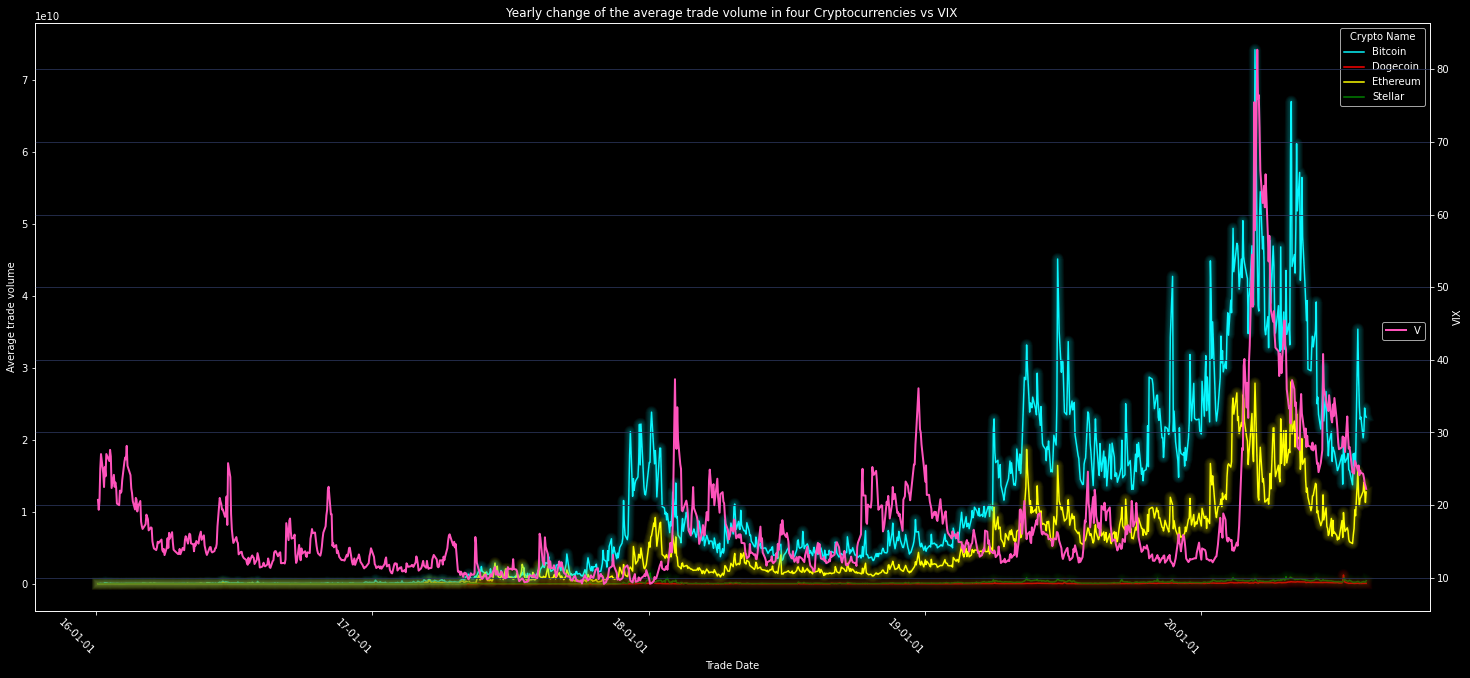

In [60]:
#volume

plt.style.use("dark_background")


#give color to the lines
colors = [
    '#08F7FE',  # teal/cyan
    'red',    # red
    'yellow',  # yellow
    'green',   # green
    'blue',   # blue
    '#00ff41', # matrix green
]

#plot data
fig, ax = plt.subplots(figsize=(25,12))
ax.grid(color='#2A3459')

#use unstack() to plot first graph
df_to_plot = merged_df.groupby(['trade_date','crypto_name']).mean()['volume'].unstack()
first_plot = df_to_plot.plot(marker='None', kind = "line", ax=ax, color=colors)
first_plot.set_xlabel("Trade Year")
first_plot.set_ylabel("Average trade volume")
first_plot.legend(title="Crypto Name")

#Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df_to_plot.plot(marker='None',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)

# adding vix line and second y-axis
ax2 = first_plot.twinx()
line, = ax2.plot(merged_df.Date, merged_df.Adj_close, marker='None', color='#FE53BB', linewidth=2)
ax2.set_ylabel('Adj Close')  
ax2.grid(color='#2A3459')
ax2.legend(ncol=1, labels='Vix', loc = 'best', bbox_to_anchor=(0.5, 0., 0.5, 0.5), mode='None', handlelength = 2.0)
ax2.set_ylabel('VIX')


#set x axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%y-%m-%d"))
ax.set_xlabel("Trade Date")
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45)

#final touch
plt.title("Yearly change of the average trade volume in four Cryptocurrencies vs VIX")
plt.grid(True)
plt.savefig("Yearly change of the average trade volume in 4 famous crypto.png")

In [63]:
# Correlation VIX and Bitcoin volume
bitcoin_df = merged_df[merged_df['crypto_name'] == 'Bitcoin']
r, p = st.pearsonr(bitcoin_df['Adj_close'], bitcoin_df['volume'])
#print("r:", r, "p:", p)
print("Correlation between VIX and Bitcoin trade volume:", r)

Correlation between VIX and Bitcoin trade volume: 0.5645861537552799


In [64]:
# Correlation VIX and Ethereum volume
Ethereum_df = merged_df[merged_df['crypto_name'] == 'Ethereum']
r, p = st.pearsonr(Ethereum_df['Adj_close'], Ethereum_df['volume'])
#print("r:", r, "p:", p)
print("Correlation between VIX and Ethereum trade volume:", r)

Correlation between VIX and Ethereum trade volume: 0.5391258547599713


In [65]:
# Correlation VIX and Bitcoin market cap
bitcoinmc_df = merged_df[merged_df['crypto_name'] == 'Bitcoin']
r, p = st.pearsonr(bitcoinmc_df['Adj_close'], bitcoinmc_df['market_cap'])
#print("r:", r, "p:", p)
print("Correlation between VIX and Bitcoin market cap:", r)

Correlation between VIX and Bitcoin market cap: 0.18042658378758475


In [66]:
# Correlation VIX and Ethereum market cap
Ethereummc_df = merged_df[merged_df['crypto_name'] == 'Ethereum']
r, p = st.pearsonr(Ethereummc_df['Adj_close'], Ethereummc_df['market_cap'])
#print("r:", r, "p:", p)
print("Correlation between VIX and Ethereum market cap:", r)

Correlation between VIX and Ethereum market cap: -0.04258065541522473
